In [5]:
from temporal_networks import *

Loading ../../counting/wos-soc-limitedtitles-cooc from disk...
Loading ../../counting/wos-econ-limitedtitles-cooc from disk...
1000 1000 terms from soc, econ


In [6]:
YWINDOW = 5
YSTEP = 5

In [7]:
"""
Pearson, Karl. “On the criterion that a given system of deviations from the probable in the case of a correlated system of variables is such that it can be reasonably supposed to have arisen from random sampling”, Philosophical Magazine. Series 5. 50 (1900), pp. 157-175.

According to [3], the total number of samples is recommended to be greater than 13, 
    otherwise exact tests (such as Barnard’s Exact test) should be used because they do not overreject.
""";

In [8]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [9]:
# contingency and expected table
def chi_stat(counter, t1, t2, yfrom, yto):
    
    ys = range(yfrom, yto)
    total = sum( counter(fy=y) for y in ys ) # accounting for undirected nature...
    
    ca = sum( counter(t=t1, fy=y) for y in ys ) # count of t1
    cb = sum( counter(t=t2, fy=y) for y in ys ) # count of t2
    cab = sum( counter(t1=t1, t2=t2, fy=y) for y in ys ) # count of them appearing together
    
    contingency = np.array([ 
        [cab, ca - cab],
        [cb - cab, total-(ca+cb)+cab]
    ])
    
    if np.any(contingency < 5):
        return +1.33
    
    if False:
        # I got different answers than chi2_contingency.
        # should check this method carefully before proceeding

        r = contingency.sum(axis=1)
        c = contingency.sum(axis=0)
        N = np.sum(r+c)

        expected = np.array([
            [ r[0]*c[0]/(N/2), r[0]*c[1]/(N/2) ],
            [ r[1]*c[0]/(N/2), r[1]*c[1]/(N/2) ]
        ])
        
        return np.sum( np.power(contingency - expected, 2) / expected )
    
    chi2, p, dof, expected = chi2_contingency(contingency)
    
    diff = contingency / expected
    if diff[0,0] > diff[1,1]:
        sgn = +1 # together
    else:
        sgn = -1 # apart
    
    return sgn*p

In [10]:
def get_tnets( counter, focal ):
    rels_l = []
    for YY in range(YMIN, YMAX, YSTEP):
        myrels = [ chi_stat(counter, focal, term, YY, YY+YWINDOW) for term in counter.terms ]
        rels_l.append(myrels)
        
    return [np.array(x) for x in rels_l]

In [16]:
focal = 'behavior'

In [17]:
tn = get_tnets(cc_soc, focal)

In [18]:
tns = np.concatenate(tn)

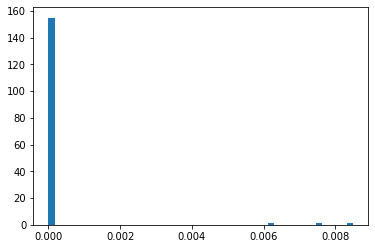

In [19]:
plt.hist(tns[np.abs(tns) < 0.01], bins=50);

In [20]:
for ti,t in enumerate(tn):
    print( YMIN + ti*YSTEP, "-", YMIN + ti*YSTEP + YWINDOW )
    #print(", ".join( [w for i,w in enumerate(cc_soc.terms) if 0 > t[i] > -0.00000000001] ))
    print(", ".join( [w for i,w in enumerate(cc_soc.terms) if 0 < t[i] < 0.00000000001] ))
    print()

1920 - 1925


1925 - 1930


1930 - 1935


1935 - 1940


1940 - 1945


1945 - 1950


1950 - 1955


1955 - 1960


1960 - 1965
attitudes

1965 - 1970
attitudes, religious, sexual

1970 - 1975
adolescent, attitude, attitudes, health, model, parental, political, process, religious, sexual

1975 - 1980
attitude, attitudes, determinants, leadership, organizational, perceived, sexual, versus

1980 - 1985
analysis, attitude, children, effect, effects, influence, model, organizational, relationship, research, sexual, social, voting

1985 - 1990
adolescent, analysis, attitudes, control, determinants, effects, group, groups, influence, marriage, model, organizational, parental, premarital, relationship, role, sexual, social, students, theory

1990 - 1995
adolescent, attitudes, children, determinants, effects, employment, maternal, model, mothers, parenting, relationship, risk, social, young

1995 - 2000
citizenship, organizational, religious, risk, sexual, women

2000 - 2005
adolescent, family, pr

In [ ]:
ws = set()
wsets = []
for ti,t in enumerate(tn):
    myws = [w for i,w in enumerate(cc_soc.terms) if 0 < np.abs( t[i] ) < 0.000001]
    wsets.append(myws)
    
    ws.update(myws)

In [ ]:
ws = sorted(ws)

In [ ]:
ys = list(range(YMIN,YMAX,YSTEP))

In [ ]:
w2i = {w:ws.index(w) for w in ws}

In [ ]:
mat = np.zeros( ( len(ys), len(ws) ) )
for si,s in enumerate(wsets):
    for w in s:
        mat[ si, w2i[w] ] = 1

Text(0.5, 1.0, 'behavior')

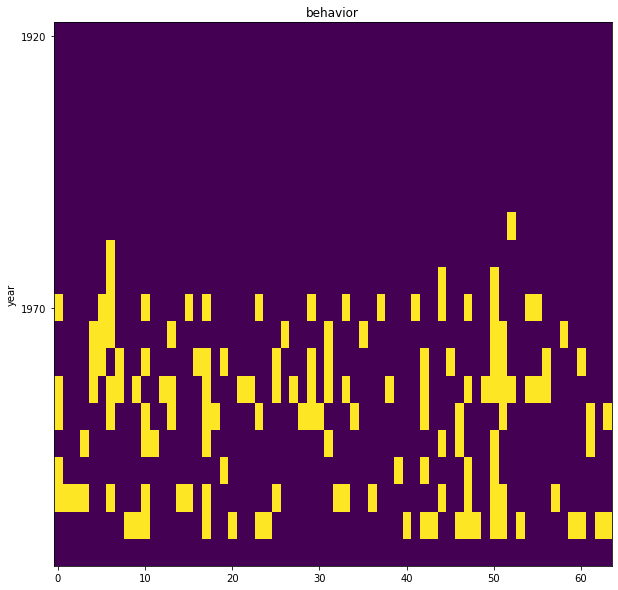

In [26]:
plt.figure(figsize=(10,10))
plt.imshow(mat, interpolation='none', aspect='auto')
plt.ylabel('year')
plt.yticks(
    range(0,mat.shape[0],10),
    ys[::10]
);
plt.title(focal)

In [27]:
from sklearn.metrics.pairwise import euclidean_distances

In [28]:
ws = set()
wsets = []
for ti,t in enumerate(tn):
    myws = [w for i,w in enumerate(cc_soc.terms) if 0 < np.abs( t[i] ) < 0.001]
    wsets.append(myws)
    
    ws.update(myws)
ws = sorted(ws)

w2i = {w:ws.index(w) for w in ws}

In [49]:
mat = np.zeros( ( len(ys), len(ws) ) )
for si,s in enumerate(wsets):
    for w in s:
        mat[ si, w2i[w] ] = tn[ si ][ cc_soc.terms.index(w) ]

In [50]:
mat = mat / mat.max()

In [31]:
mat = -np.log( mat )

/var/folders/p5/2p583dmn5fg70h33tc5c2hy80000gn/T/ipykernel_1714/1398610594.py:1: RuntimeWarning: divide by zero encountered in log
  mat = -np.log( mat )


In [32]:
#mat[np.isinf(mat)] = mat[~np.isinf(mat)].max()
mat[np.isinf(mat)] = 0

(array([1.266e+03, 2.800e+01, 8.000e+00, 1.000e+01, 0.000e+00, 3.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 2.000e+00]),
 array([  0.        ,  56.45683451, 112.91366903, 169.37050354,
        225.82733806, 282.28417257, 338.74100709, 395.1978416 ,
        451.65467612, 508.11151063, 564.56834515]),
 <BarContainer object of 10 artists>)

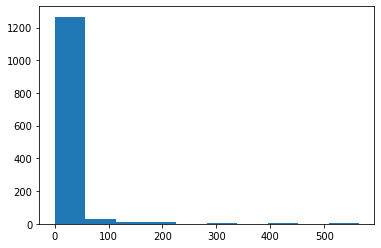

In [33]:
plt.hist(mat.flatten())

In [34]:
d = euclidean_distances(mat.T)

In [35]:
d.shape

(66, 66)

In [36]:
# reorder intelligently
order = [0]

while len(order) < mat.shape[1]:
    last = order[-1]
    sorts = list(np.argsort( d[order] ).flatten())
    cand = [x for x in sorts if x!=last and x not in order]
    order.append(cand[0])

In [37]:
mat.shape

(20, 66)

In [38]:
mat_sort = mat[:, order]

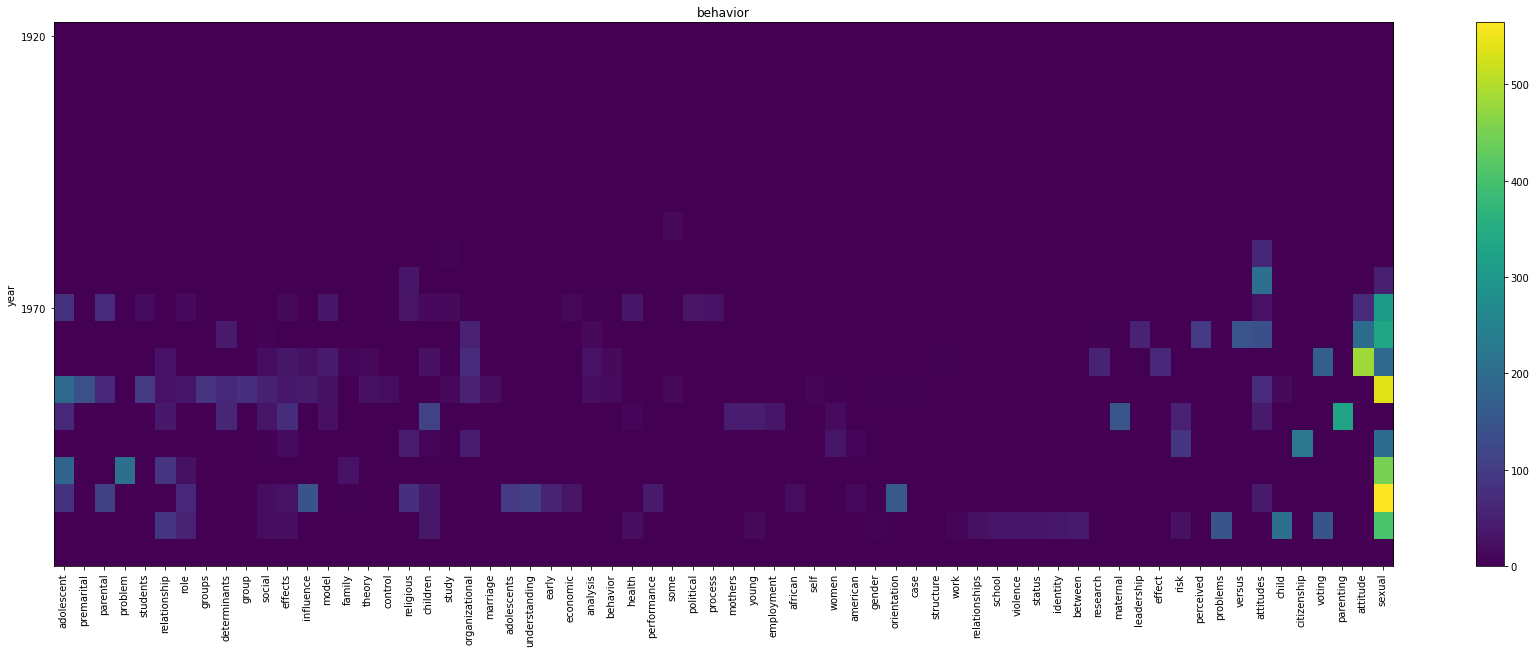

In [39]:
plt.figure(figsize=(30,10))

plt.imshow(mat_sort, interpolation='none', aspect='auto')
plt.ylabel('year')
plt.yticks(
    range(0,mat_sort.shape[0],10),
    ys[::10]
);
plt.xticks(
    range(mat.shape[1]),
    [ws[order[i]] for i in range(mat.shape[1])],
    rotation=90,
    fontsize=10
);
plt.title(focal)
plt.colorbar()

In [40]:
(
    np.sum( [cc_soc(t1='behavior', t2='attitudes', fy=YY) for YY in range(YMIN,YMIN+YWINDOW) ]),
    np.sum( [cc_soc(t='behavior', fy=YY) for YY in range(YMIN,YMIN+YWINDOW) ]),
    np.sum( [cc_soc(t='attitudes', fy=YY) for YY in range(YMIN,YMIN+YWINDOW)] )
)

(0, 4, 0)

In [42]:
with open(f'chi2.temp.focal-{focal}.soc.csv', 'w', encoding='utf8') as outf:
    w = csv.writer(outf)
    w.writerow([ 't1','t2','p', 'neglogp', 'sign','y_start','y_end'])
    for YS in range(YMIN,YMAX,YSTEP):
        yi = (YS-YMIN)//YSTEP
        for ti,t in enumerate(cc_soc.terms):
            pvalue = tn[yi][ti]
            if not( 0 < np.abs(pvalue) < 0.00000000001 ):
                continue
                
            w.writerow([focal, t, pvalue, -np.log(pvalue*1e6), int(np.sign(pvalue)), YS, YS+YWINDOW])